In [1]:
# 데이터 로드
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1)

In [2]:
# train, test split
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]
X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

* 랜덤포레스트에 적용

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 랜덤포레스트에 적용 (n_estimators=10, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

In [26]:
# 정확도 결과
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도: {accuracy:.4f}")

정확도: 0.9492


# 1. PCA

* PCA로 변환한 데이터 세트에 랜덤 포레스트 적용

In [27]:
# PCA 라이브러리 불러오기
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [28]:
# PCA 적용 95% : n_components=0.95
pca = PCA(n_components=0.95, random_state=42)

In [29]:
# PCA 이후 랜덤포레스트 훈련
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
rf_clf_pca = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
rf_clf_pca.fit(X_train_pca, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [30]:
# 정확도 결과 (X_test도 PCA 적용해야합니다.)
y_pred_pca = rf_clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"PCA 적용 후 랜덤 포레스트 정확도: {accuracy_pca:.4f}")

PCA 적용 후 랜덤 포레스트 정확도: 0.8925


**관련 문제**

* PCA모델을 와인 데이터셋에 적용하여 차원을 축소하고 그 결과를 그래프로 나타내보세요.

(1) 필요한 모듈 불러오기

In [31]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(2)  load_wine을 사용해 데이터셋을 생성한다.

In [32]:
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data)

(3) X에 표준 스케일링(Standard scaling)을 적용하여 X_scaled을 생성한다.

In [33]:
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df)

(4) PCA 모델을 X에 적용하여 2개의 차원으로 추출한다. 단, random_state=1234로 설정한다.

In [34]:
#PCA 모델을 X_scaled에 적용하여 2개의 차원으로 추출한다.

pca = PCA(n_components=2, random_state=1234)
wine_pca = pca.fit_transform(wine_scaled)

print(wine_pca.shape)

(178, 2)


(5) 추출한 피처를 그래프로 나타내라.

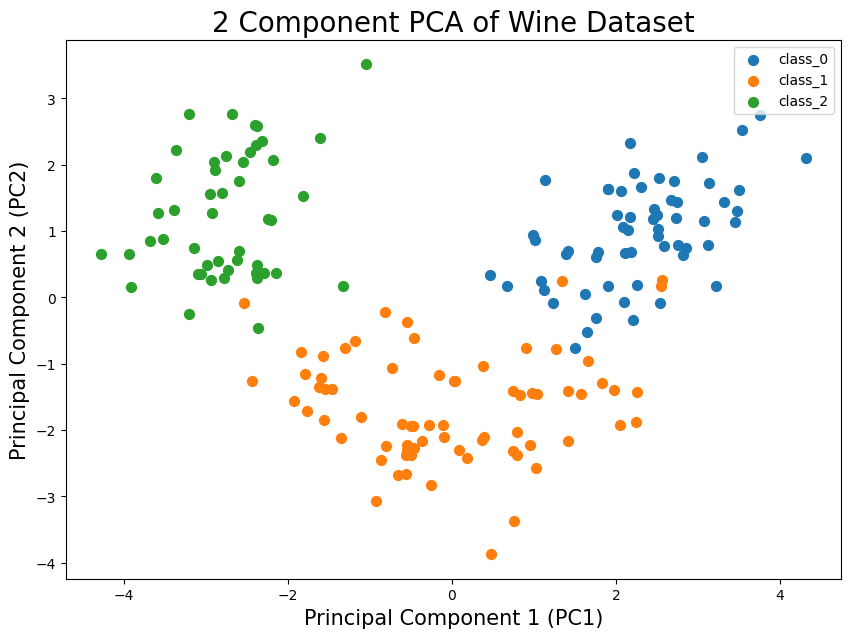

In [38]:
pca_df = pd.DataFrame(data=wine_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

plt.figure(figsize=(10, 7))

targets = wine.target_names

for target, color in zip(np.unique(y), colors):
    indices_to_keep = pca_df['target'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'PC1'],
                pca_df.loc[indices_to_keep, 'PC2'],
                s=50,
                label=targets[target])

plt.xlabel('Principal Component 1 (PC1)', fontsize=15)
plt.ylabel('Principal Component 2 (PC2)', fontsize=15)
plt.title('2 Component PCA of Wine Dataset', fontsize=20)
plt.legend()
plt.show()


# 2. LDA

- LDA로 변환한 데이터 세트에 랜덤 포레스트 적용

In [39]:
# LDA 라이브러리 불러오기
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [40]:
# LDA 적용 : n_components=5
lda = LDA(n_components=5)

In [41]:
# LDA 이후 랜덤포레스트 훈련
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

forest_clf_lda = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
forest_clf_lda.fit(X_train_lda, y_train)
y_pred_forest_lda = forest_clf_lda.predict(X_test_lda)

In [42]:
# 정확도 결과 (X_test도 LDA 적용해야합니다.)
accuracy_lda = accuracy_score(y_test, y_pred_forest_lda)
print('LDA 적용 후 랜덤 포레스트 정확도:', accuracy_lda)

LDA 적용 후 랜덤 포레스트 정확도: 0.8301
